In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
from time import time
from IPython.display import display
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import GridSearchCV
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


# Load the Data

In [2]:
data = pd.read_csv('binary_classifier_data/training.csv')
target_raw = data['classLabel'].eq('yes.').mul(1)
data = data.drop('classLabel',axis=1)
data.shape

(3700, 18)

In [3]:
validation_data= pd.read_csv('binary_classifier_data/validation.csv')
v_target_raw = validation_data['classLabel'].eq('yes.').mul(1)
v_data = validation_data.drop('classLabel',axis=1)
v_data.shape

(200, 18)

In [4]:
v_data.isnull().sum()

variable1       3
variable2       3
variable3       0
variable4       2
variable5       2
variable6       3
variable7       3
variable8       0
variable9       0
variable10      0
variable11      0
variable12      0
variable13      0
variable14      3
variable15      0
variable17      3
variable18    111
variable19      0
dtype: int64

## Check if there's too much missing values 
### And replace them / drop

In [5]:
# Drop Variable18 because it has too much nulls 
data.isnull().sum()

variable1       39
variable2       39
variable3        0
variable4       64
variable5       64
variable6       66
variable7       66
variable8        0
variable9        0
variable10       0
variable11       0
variable12       0
variable13       0
variable14     100
variable15       0
variable17     100
variable18    2145
variable19       0
dtype: int64

In [6]:
print('Percent of missing "variable18" records is %.2f%%' %((data['variable18'].isnull().sum()/data.shape[0])*100))

Percent of missing "variable18" records is 57.97%


~ 58% of variable18 values are missing 

In [7]:
# drop variable 18 MANY NULLS 
data = data.drop('variable18' , axis = 1)
v_data = v_data.drop('variable18', axis=1)

In [8]:
def print_missing_precent(data):
    print('Percent of missing "variable1" and ""variable2"" records is %.2f%%' %((data['variable1'].isnull().sum()/data.shape[0])*100))
    print('Percent of missing "variable4" and "variable5" records is %.2f%%' %((data['variable4'].isnull().sum()/data.shape[0])*100))
    print('Percent of missing "variable6" "variable7" records is %.2f%%' %((data['variable6'].isnull().sum()/data.shape[0])*100))
    print('Percent of missing "variable14" and "variable17" records is %.2f%%' %((data['variable14'].isnull().sum()/data.shape[0])*100))

In [9]:
print_missing_precent(data)

Percent of missing "variable1" and ""variable2"" records is 1.05%
Percent of missing "variable4" and "variable5" records is 1.73%
Percent of missing "variable6" "variable7" records is 1.78%
Percent of missing "variable14" and "variable17" records is 2.70%


In [10]:
print_missing_precent(v_data)

Percent of missing "variable1" and ""variable2"" records is 1.50%
Percent of missing "variable4" and "variable5" records is 1.00%
Percent of missing "variable6" "variable7" records is 1.50%
Percent of missing "variable14" and "variable17" records is 1.50%


Variables : 1 4 5 6 7 are String values , so we can just impute with thier max values.

 Values for variable1 (a , b ):
b    2382
a    1279
Name: variable1, dtype: int64


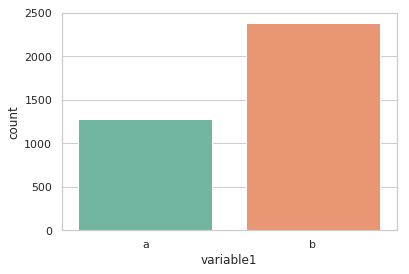

In [11]:
print(' Values for variable1 (a , b ):')
print(data['variable1'].value_counts())
sns.countplot(x='variable1', data=data, palette='Set2')
plt.show()

In [12]:
print('The most common value in "variable1" is %s.' %data['variable1'].value_counts().idxmax())

The most common value in "variable1" is b.


In [13]:
train_data = data.copy()
validation_data = v_data.copy()

In [14]:
def replace_missing_strings_v(final_data,data):
    final_data["variable1"].fillna(data['variable1'].value_counts().idxmax(), inplace=True)
    final_data["variable4"].fillna(data['variable4'].value_counts().idxmax(), inplace=True)
    final_data["variable5"].fillna(data['variable5'].value_counts().idxmax(), inplace=True)
    final_data["variable6"].fillna(data['variable6'].value_counts().idxmax(), inplace=True)
    final_data["variable7"].fillna(data['variable7'].value_counts().idxmax(), inplace=True)

In [15]:
# training
replace_missing_strings_v(train_data,data)

In [16]:
# validation
replace_missing_strings_v(validation_data,v_data)

replace the numerical data with thier mean .. the missing values are not too much so its will not make a big diffrence. 

In [17]:
# Impute the missing values with mean imputation
def replace_numerical(final_data,data):
    final_data['variable2'].fillna(data['variable2'].mean(), inplace=True)
    final_data['variable14'].fillna(data['variable14'].mean(), inplace=True)
    final_data['variable17'].fillna(data['variable17'].mean(), inplace=True)

In [18]:
replace_numerical(train_data,data)

In [19]:
replace_numerical(validation_data,v_data)

## Normalization

In [20]:
features_log_transformed = pd.DataFrame(data = train_data)

In [21]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['variable2', 'variable3', 'variable8', 'variable14', 'variable15','variable17','variable19']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable19
0,a,0.062707,0.019286,u,g,c,v,0.061404,f,t,1,t,g,0.068966,0.00005,0.068966,0.0
1,b,0.047669,0.011964,y,p,k,v,0.010175,f,f,0,f,s,0.172414,0.00000,0.172414,0.0
2,b,0.263158,0.040179,u,g,ff,ff,0.000000,f,t,1,f,g,0.082759,0.00019,0.082759,0.0
3,a,0.517594,0.047679,u,g,i,o,0.011754,f,f,0,f,g,0.000000,0.00120,0.000000,0.0
4,b,0.279398,0.125000,u,g,k,v,0.017544,f,f,0,t,g,0.200000,0.00000,0.200000,0.0


In [22]:
vfeatures_log_transformed = pd.DataFrame(data = validation_data)

In [23]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['variable2', 'variable3', 'variable8', 'variable14', 'variable15','variable17','variable19']

vfeatures_log_minmax_transform = pd.DataFrame(data = vfeatures_log_transformed)
vfeatures_log_minmax_transform[numerical] = scaler.fit_transform(vfeatures_log_transformed[numerical])

# Show an example of a record with scaling applied
display(vfeatures_log_minmax_transform.head(n = 5))

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable19
0,b,0.269768,0.298983,u,g,e,bb,0.07925,t,f,0,t,s,0.210,0.0000,0.210,1.0
1,b,0.125925,0.071357,u,g,c,v,0.02700,f,f,0,t,g,0.068,0.0001,0.068,0.0
2,b,0.337005,0.029898,y,p,d,v,0.02925,f,f,0,f,g,0.120,0.0003,0.120,1.0
3,b,0.041098,0.415188,y,p,aa,v,0.00625,t,f,0,f,g,0.060,0.0375,0.060,0.0
4,b,0.141049,0.531593,y,p,aa,v,0.00200,f,f,0,t,g,0.060,0.0475,0.060,1.0


## encoding

In [24]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
data_final = pd.get_dummies(features_log_minmax_transform)


# Print the number of features after one-hot encoding
encoded = list(data_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
data_final.head()

48 total features after one-hot encoding.


,variable2,variable3,variable8,variable11,variable14,variable15,variable17,variable19,variable1_a,variable1_b,...,variable7_z,variable9_f,variable9_t,variable10_f,variable10_t,variable12_f,variable12_t,variable13_g,variable13_p,variable13_s
0,0.062707,0.019286,0.061404,1,0.068966,0.00005,0.068966,0.0,1,0,...,0,1,0,0,1,0,1,1,0,0
1,0.047669,0.011964,0.010175,0,0.172414,0.00000,0.172414,0.0,0,1,...,0,1,0,1,0,1,0,0,0,1
2,0.263158,0.040179,0.000000,1,0.082759,0.00019,0.082759,0.0,0,1,...,0,1,0,0,1,1,0,1,0,0
3,0.517594,0.047679,0.011754,0,0.000000,0.00120,0.000000,0.0,1,0,...,0,1,0,1,0,1,0,1,0,0
4,0.279398,0.125000,0.017544,0,0.200000,0.00000,0.200000,0.0,0,1,...,0,1,0,1,0,0,1,1,0,0


In [25]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
v_final = pd.get_dummies(vfeatures_log_minmax_transform)


# Print the number of features after one-hot encoding
encoded = list(v_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
v_final.head()

44 total features after one-hot encoding.


,variable2,variable3,variable8,variable11,variable14,variable15,variable17,variable19,variable1_a,variable1_b,...,variable7_z,variable9_f,variable9_t,variable10_f,variable10_t,variable12_f,variable12_t,variable13_g,variable13_p,variable13_s
0,0.269768,0.298983,0.07925,0,0.210,0.0000,0.210,1.0,0,1,...,0,0,1,1,0,0,1,0,0,1
1,0.125925,0.071357,0.02700,0,0.068,0.0001,0.068,0.0,0,1,...,0,1,0,1,0,0,1,1,0,0
2,0.337005,0.029898,0.02925,0,0.120,0.0003,0.120,1.0,0,1,...,0,1,0,1,0,1,0,1,0,0
3,0.041098,0.415188,0.00625,0,0.060,0.0375,0.060,0.0,0,1,...,0,0,1,1,0,1,0,1,0,0
4,0.141049,0.531593,0.00200,0,0.060,0.0475,0.060,1.0,0,1,...,0,1,0,1,0,0,1,1,0,0


In [26]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_final, 
                                                    target_raw, 
                                                    test_size = 0.3, 
                                                    random_state = 20)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 2590 samples.
Testing set has 1110 samples.


In [27]:
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
y_pred = logreg.predict(X_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ",logreg.score(X_test,y_test))

# Print the confusion matrix of the logreg model

print(confusion_matrix(y_test,y_pred))

Accuracy of logistic regression classifier:  1.0
[[  79    0]
 [   0 1031]]


In [29]:
# Define the grid of values for tol and max_iter
tol = [0.01,0.001,0.0001]
max_iter = [100,150,200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol=tol, max_iter=max_iter)

In [30]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Fit data to grid_model
grid_model_result = grid_model.fit(data_final,target_raw)

# Summarize results
best_score, best_params = grid_model_result.best_score_,grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 1.000000 using {'max_iter': 100, 'tol': 0.01}
